# Download the custom aircraft dataset from Roboflow in YOLOv8 format

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xxxx")
project = rf.workspace("computer-vision-projects-mqas5").project("aircraft-detection-jrbna")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


# Train a YOLOv8 model


In [3]:
!pip install ultralytics
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
results = model.train(data='/content/Aircraft-Detection-1/data.yaml', epochs=50, batch=16, imgsz=640, optimizer='AdamW')


Ultralytics 8.3.218 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Aircraft-Detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, plots

# Display YOLOv8 training results

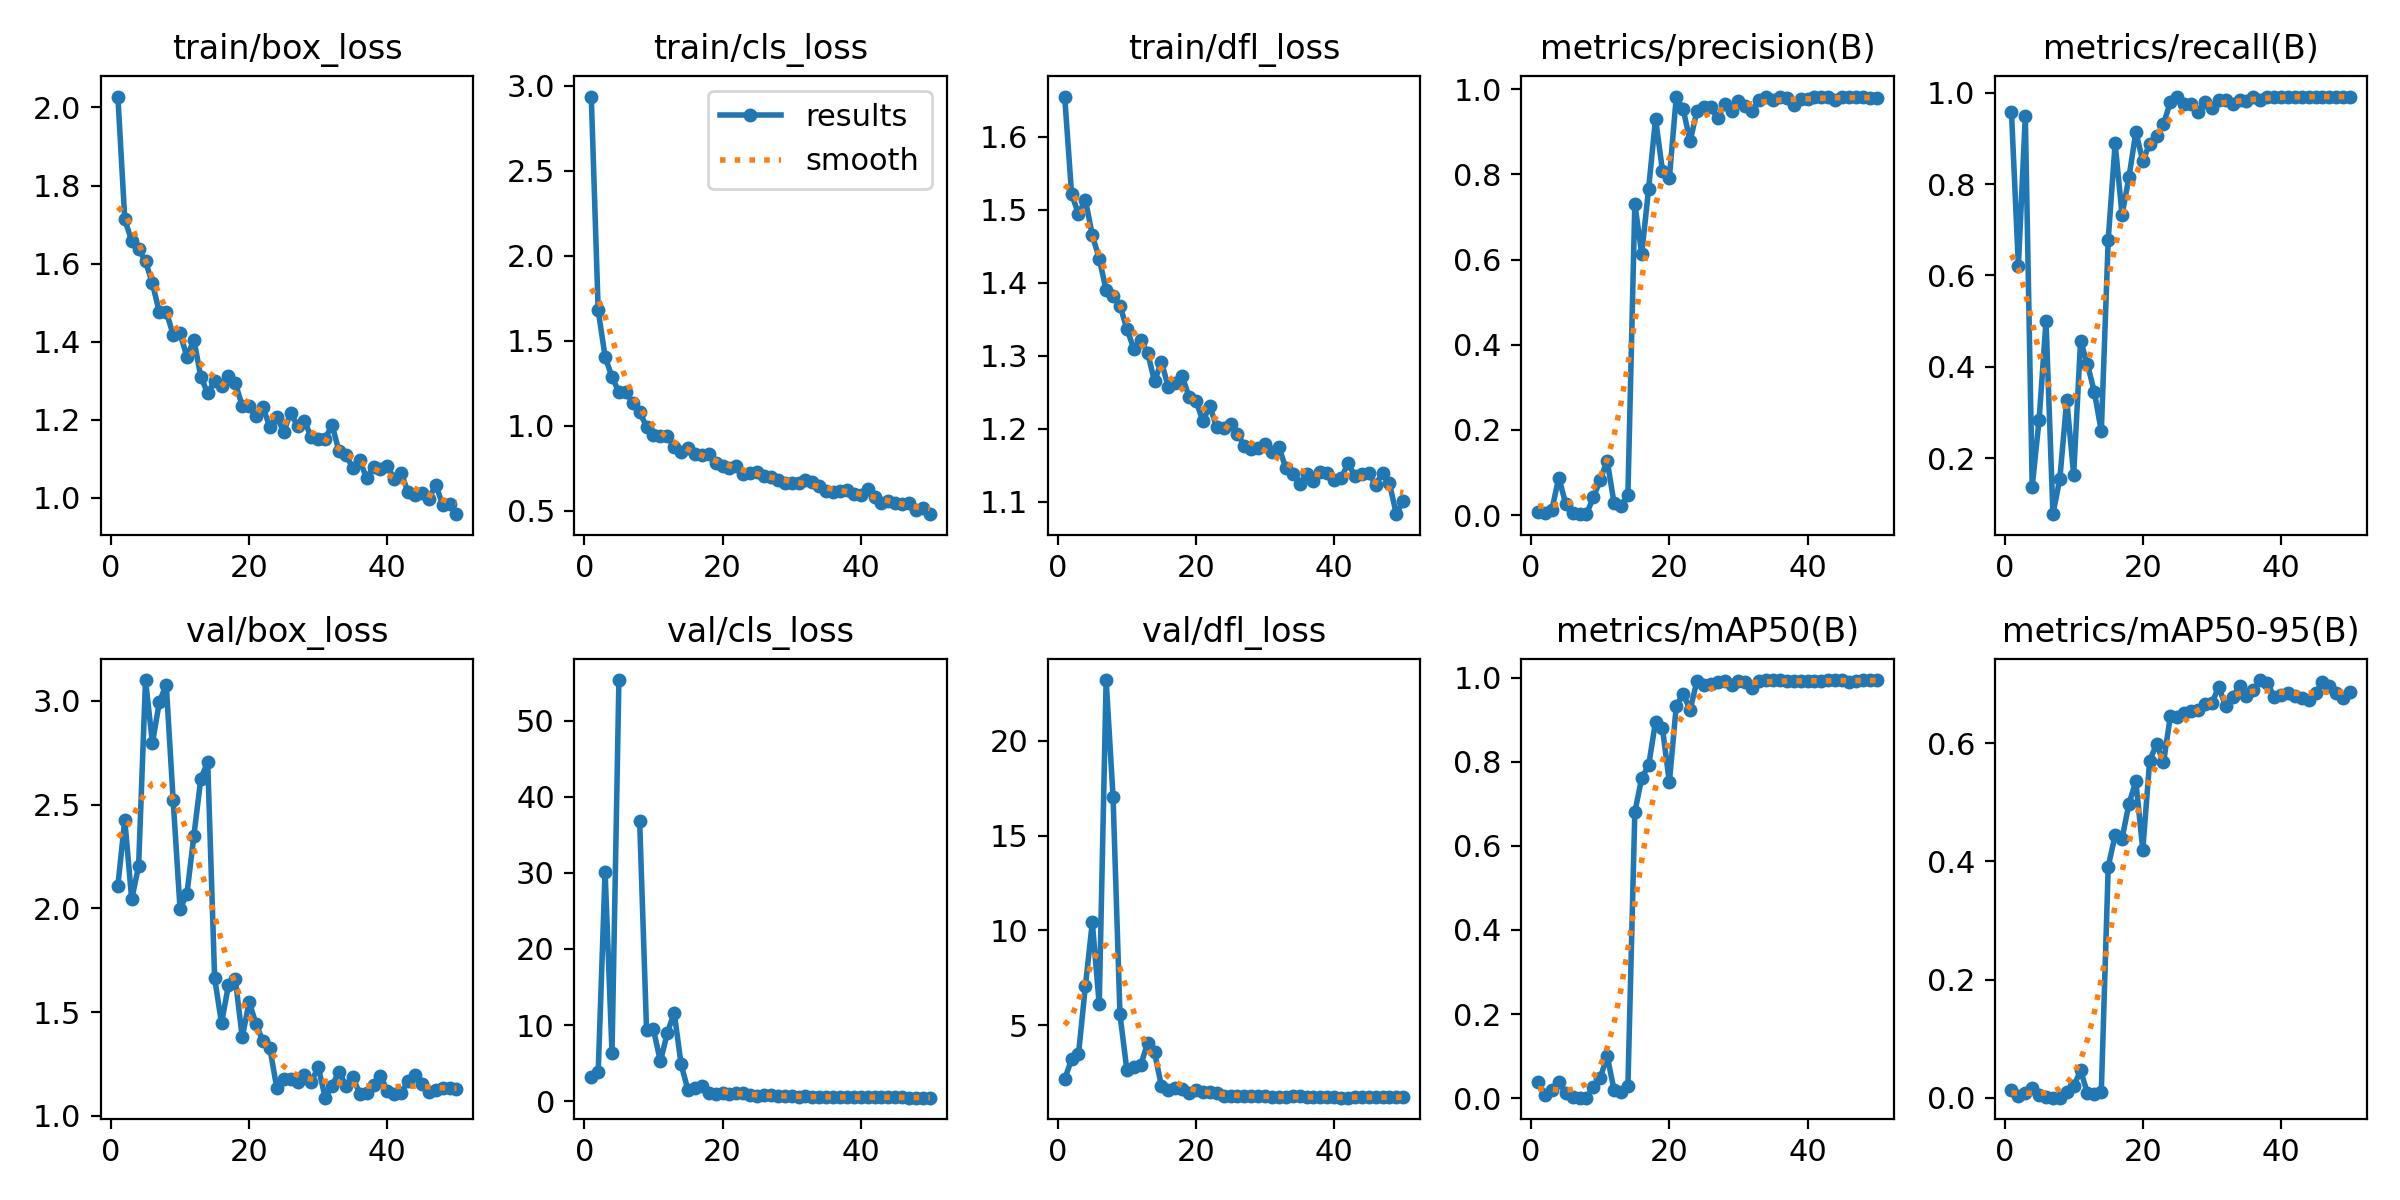

In [4]:
from IPython.display import Image
Image(filename='/content/runs/detect/train2/results.png', width=800)

In [6]:
!cp /content/runs/detect/train3/weights/best.pt /content/drive/MyDrive/best_aircraft_model.pt

# Test trained YOLOv8 model

In [5]:
video_path = "/content/drive/MyDrive/Bilgisayar mühendisliği/3 Aylık Program/Adım 1/Proje/Videos/test-5.mp4"

results = model.predict(source=video_path, conf=0.4, save=True, show=False)


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/322) /content/drive/MyDrive/Bilgisayar mühendisliği/3 Aylık Program/Adım 1/Proje/Videos/test-5.mp4: 384x640 3 aircrafts, 40.9ms
video 1/1 (frame 2/322) /content/drive/MyDrive/Bilgisayar mühendisliği/3 Aylık Program/Adım 1/Proje/Videos/test-5.mp4: 384x640 3 aircrafts, 9.7ms
video 1/1 (frame 3/322) /content/drive/MyDrive/Bilgisayar mühendisliği/3 Aylık Program/Adım 1/Proje/Videos/test-5.mp4: 384x640 3 aircrafts, 12.1ms
video 1/1 (frame

#Tracking: detect and track aircraft IDs in video

In [8]:
!pip install ultralytics supervision opencv-python

model = YOLO('/content/runs/detect/train3/weights/best.pt')
results = model.track(source="/content/drive/MyDrive/Bilgisayar mühendisliği/3 Aylık Program/Adım 1/Proje/Videos/test-5.mp4",conf=0.4,iou=0.5,tracker="bytetrack.yaml",save=True)

requirements: Ultralytics requirement ['lap>=0.5.12'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 0.5s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/322) /content/drive/MyDrive/Bilgisayar mühendisliği/3 Aylık Program/Adım 1/Proje/Videos/test-5.mp4: 384x640 3 aircrafts, 7.1ms
video 1/1 (frame 2/322) /content/drive/MyDrive/Bilgisayar mühendisliği/3 Aylık Program/Adım 1